# Models Comparison for TinyML

In [94]:
# Load libraries
import numpy as np
from numpy import arange
import pickle
#
import matplotlib.pyplot as plt

#
import pandas as pd
from pandas import read_csv

from sklearn.metrics import confusion_matrix,  classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import tensorflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from micromlgen import port
import tinymlgen as tiny

import warnings
import seaborn as sbs
import sys

warnings.filterwarnings('ignore')

In [95]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tensorflow.random.set_seed(RANDOM_SEED)
np.set_printoptions(threshold=sys.maxsize)

In [96]:
with open('data/X.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y.pkl', 'rb') as f:
    y = pickle.load(f)

In [97]:
# Set number of labels here !!!!
n_labels = 10
samples = 100
X = X[:n_labels*samples]
y = y[:n_labels*samples]
labels = np.unique(y)

In [98]:
classes = np.unique(y).tolist()
for i in range(len(classes)):
    y = np.where(y==classes[i], i, y)

In [99]:
y = np.array([int(el) for el in y])
print(y)

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)
print(X_test.shape)
print(y_test.shape)


(200, 42)
(200,)


In [101]:
X_test

array([[ 0.17, -0.11,  0.92,  0.15, -0.08,  0.93,  0.16, -0.14,  1.36,
         0.15, -0.28,  0.92,  0.28,  0.01,  0.36,  0.31,  0.11,  0.7 ,
         0.19,  0.29,  1.11,  0.07, -0.1 ,  1.35,  0.1 ,  0.02,  0.65,
         0.18,  0.15,  1.02,  0.13, -0.11,  0.98,  0.15, -0.05,  0.95,
         0.16, -0.01,  0.98,  0.17, -0.  ,  0.97],
       [ 0.1 , -0.03,  0.97,  0.1 , -0.01,  1.02,  0.05, -0.3 ,  1.06,
         0.12, -0.  ,  0.64,  0.12,  0.27,  0.88,  0.08,  0.13,  1.1 ,
         0.06, -0.15,  1.11,  0.13,  0.01,  0.83,  0.16,  0.02,  0.8 ,
         0.12,  0.09,  1.02,  0.07,  0.03,  1.07,  0.04, -0.09,  1.  ,
         0.06, -0.01,  1.  ,  0.06, -0.01,  0.98],
       [ 0.23,  0.03,  0.98,  0.21, -0.  ,  0.92,  0.29,  0.06,  1.18,
         0.23, -0.2 ,  0.95,  0.37,  0.08,  0.6 ,  0.44,  0.21,  0.7 ,
         0.41,  0.28,  1.02,  0.25,  0.16,  1.19,  0.25,  0.07,  0.95,
         0.21,  0.02,  0.96,  0.26,  0.09,  0.95,  0.21,  0.03,  0.97,
         0.23,  0.05,  0.94,  0.21,  0.  ,  0.

In [102]:
y_test

array([1, 0, 6, 5, 0, 2, 9, 2, 4, 5, 0, 0, 8, 0, 9, 3, 8, 5, 3, 9, 2, 6,
       0, 2, 0, 1, 7, 8, 5, 5, 6, 2, 5, 4, 1, 6, 9, 4, 2, 3, 8, 9, 7, 0,
       5, 5, 6, 1, 4, 7, 4, 6, 4, 5, 8, 3, 3, 1, 1, 8, 6, 8, 8, 9, 3, 9,
       9, 1, 9, 7, 6, 8, 1, 7, 8, 4, 3, 7, 7, 7, 3, 7, 8, 4, 5, 9, 8, 4,
       9, 5, 6, 8, 6, 3, 2, 5, 5, 2, 8, 8, 6, 0, 8, 7, 6, 9, 3, 3, 6, 3,
       0, 0, 1, 2, 1, 2, 1, 9, 8, 7, 3, 0, 5, 9, 8, 1, 6, 4, 6, 3, 6, 4,
       7, 5, 7, 2, 3, 2, 3, 8, 5, 0, 3, 0, 2, 4, 4, 0, 1, 4, 7, 1, 1, 0,
       9, 0, 6, 5, 1, 0, 3, 3, 4, 5, 8, 9, 9, 2, 7, 0, 6, 5, 0, 9, 7, 1,
       7, 4, 2, 3, 6, 4, 9, 4, 1, 7, 6, 2, 5, 2, 4, 1, 7, 7, 4, 2, 2, 1,
       9, 2])

## Model Spotting

In [103]:
# Test options and evaluation metric
num_folds = 5
seed = 42
scoring = 'f1_macro'

In [104]:
# Spot-Check Algorithms
models = []

#models.append(('XGB', XGBClassifier(random_state=seed)))
models.append(('GNB', GaussianNB(var_smoothing=2e-9)))
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('CART' , DecisionTreeClassifier(random_state=seed)))
models.append(('SVC' , SVC(gamma=0.99, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=100, 
                                                           max_features=5, criterion='gini', max_depth=None,
                                                           min_samples_split=4, min_samples_leaf=1)))


In [105]:
# Cross Validation
results = []
names = []
for name, model in models:
    # Dividere dati in n = num_folds
    kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = np.array([])
    for train_idx, test_idx, in kf.split(X_train, y_train):
        X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
        X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
        model.fit(X_cross_train, y_cross_train)  
        y_pred = model.predict(X_cross_test)
        f1s = f1_score(y_cross_test, y_pred, average="weighted")
        cv_results = np.append(cv_results, [f1s])
    results.append(cv_results)
    names.append(name)
    #msg = "%s - %f - %f" % (name, cv_results.mean(), cv_results.std())
    msg = "{} - {:.2f} {:.2f}".format(name, cv_results.mean(), cv_results.std()).replace('.', ',')
    print(msg)

GNB - 0,85 0,03
LR - 0,85 0,03
CART - 0,75 0,02
SVC - 0,92 0,01
RF - 0,90 0,01


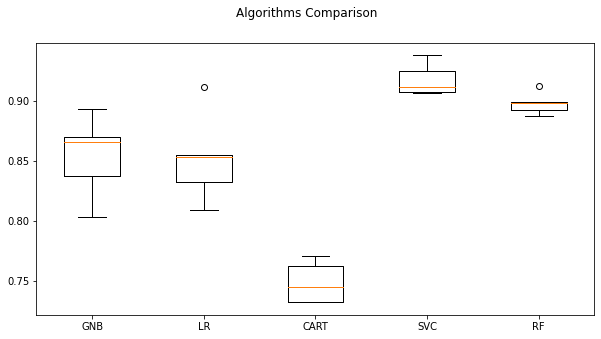

In [106]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Valutazione dei migliori algoritmi su test

## Valutazione modelli sul Test Set

In [107]:
for name, model in models:
    model.fit(X_train,  y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(f"Model {name}: ")
    report = classification_report(y_test, pred_test)
    print(report)
    print("-------------------------------------------------------------")

Model GNB: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.83      1.00      0.91        20
           2       0.94      0.85      0.89        20
           3       0.65      0.75      0.70        20
           4       0.74      1.00      0.85        20
           5       0.82      0.70      0.76        20
           6       0.94      0.85      0.89        20
           7       0.94      0.85      0.89        20
           8       0.82      0.70      0.76        20
           9       0.90      0.90      0.90        20

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

-------------------------------------------------------------
Model LR: 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.95      0.95      0.95    

# Neural Network

In [108]:
#Hyperparameters of NN
EPOCHS = 500 
BATCH_SIZE = 7
learn_rate = 0.001
nodes = 256
def getNetwork():
    model = Sequential(name="Sequential-NN")
    model.add(layers.Dense(X.shape[1], activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dropout(0.25))    
    model.add(layers.Dense(nodes, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(np.unique(y).size, activation='softmax'))
    opt = Adam(learning_rate=learn_rate)
    # SGB
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

## Cross Validation NN

In [41]:
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, random_state=seed, shuffle=True)
cv_results = np.array([])
for train_idx, test_idx, in kf.split(X_train, y_train):
    X_cross_train, y_cross_train = X_train[train_idx], y_train[train_idx]
    
    X_cross_test, y_cross_test = X_train[test_idx], y_train[test_idx]
 
    model = getNetwork()
    model.fit(X_cross_train, y_cross_train, epochs=EPOCHS, batch_size=BATCH_SIZE)  
    y_pred = model.predict(X_cross_test)
    predictions_categorical = np.argmax(y_pred, axis=1)
    f1s = f1_score(y_cross_test, predictions_categorical, average="weighted")
    cv_results = np.append(cv_results, [f1s])

print(f'Average score of Cross Validation: {cv_results.mean()}')

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_14 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 514       
Total params: 13,328
Trainable params: 13,328
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
19/19 [==============================] - 0s 518us/step - loss: 0.6785 - accuracy: 0.5469
Epoch 2/500
19

19/19 [==============================] - 0s 500us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 151/500
19/19 [==============================] - 0s 507us/step - loss: 5.5734e-04 - accuracy: 1.0000
Epoch 152/500
19/19 [==============================] - 0s 470us/step - loss: 2.2097e-04 - accuracy: 1.0000
Epoch 153/500
19/19 [==============================] - 0s 475us/step - loss: 2.0479e-04 - accuracy: 1.0000
Epoch 154/500
19/19 [==============================] - 0s 564us/step - loss: 4.2026e-04 - accuracy: 1.0000
Epoch 155/500
19/19 [==============================] - 0s 471us/step - loss: 5.0641e-04 - accuracy: 1.0000
Epoch 156/500
19/19 [==============================] - 0s 489us/step - loss: 3.2320e-04 - accuracy: 1.0000
Epoch 157/500
19/19 [==============================] - 0s 539us/step - loss: 2.2127e-04 - accuracy: 1.0000
Epoch 158/500
19/19 [==============================] - 0s 459us/step - loss: 5.3114e-04 - accuracy: 1.0000
Epoch 159/500
19/19 [==============================] - 

19/19 [==============================] - 0s 433us/step - loss: 0.0300 - accuracy: 0.9922
Epoch 306/500
19/19 [==============================] - 0s 459us/step - loss: 0.0278 - accuracy: 0.9922
Epoch 307/500
19/19 [==============================] - 0s 411us/step - loss: 0.0094 - accuracy: 0.9922
Epoch 308/500
19/19 [==============================] - 0s 451us/step - loss: 0.0234 - accuracy: 0.9844
Epoch 309/500
19/19 [==============================] - 0s 426us/step - loss: 0.0136 - accuracy: 0.9922
Epoch 310/500
19/19 [==============================] - 0s 426us/step - loss: 0.0225 - accuracy: 0.9922
Epoch 311/500
19/19 [==============================] - 0s 446us/step - loss: 0.0145 - accuracy: 0.9922
Epoch 312/500
19/19 [==============================] - 0s 478us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 313/500
19/19 [==============================] - 0s 454us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 314/500
19/19 [==============================] - 0s 536us/step - loss: 0.0020 - a

19/19 [==============================] - 0s 430us/step - loss: 1.3879e-04 - accuracy: 1.0000
Epoch 460/500
19/19 [==============================] - 0s 431us/step - loss: 7.9529e-05 - accuracy: 1.0000
Epoch 461/500
19/19 [==============================] - 0s 417us/step - loss: 8.3090e-05 - accuracy: 1.0000
Epoch 462/500
19/19 [==============================] - 0s 461us/step - loss: 4.4032e-04 - accuracy: 1.0000
Epoch 463/500
19/19 [==============================] - 0s 680us/step - loss: 2.4514e-04 - accuracy: 1.0000
Epoch 464/500
19/19 [==============================] - 0s 418us/step - loss: 5.0487e-04 - accuracy: 1.0000
Epoch 465/500
19/19 [==============================] - 0s 522us/step - loss: 2.4360e-04 - accuracy: 1.0000
Epoch 466/500
19/19 [==============================] - 0s 460us/step - loss: 1.1249e-04 - accuracy: 1.0000
Epoch 467/500
19/19 [==============================] - 0s 390us/step - loss: 1.0661e-04 - accuracy: 1.0000
Epoch 468/500
19/19 [==============================

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_16 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 514       
Total params: 13,328
Trainable params: 13,328
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
19/19 [==============================] - 0s 392us/step - loss: 0.7545 - accuracy: 0.4297
Epoch 2/500
19

19/19 [==============================] - 0s 377us/step - loss: 0.0086 - accuracy: 0.9922
Epoch 151/500
19/19 [==============================] - 0s 391us/step - loss: 0.0082 - accuracy: 0.9922
Epoch 152/500
19/19 [==============================] - 0s 386us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 153/500
19/19 [==============================] - 0s 383us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 154/500
19/19 [==============================] - 0s 373us/step - loss: 4.9022e-04 - accuracy: 1.0000
Epoch 155/500
19/19 [==============================] - 0s 380us/step - loss: 6.0594e-04 - accuracy: 1.0000
Epoch 156/500
19/19 [==============================] - 0s 383us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 157/500
19/19 [==============================] - 0s 378us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 158/500
19/19 [==============================] - 0s 377us/step - loss: 5.7386e-04 - accuracy: 1.0000
Epoch 159/500
19/19 [==============================] - 0s 451us/step - loss

19/19 [==============================] - 0s 434us/step - loss: 5.4579e-04 - accuracy: 1.0000
Epoch 306/500
19/19 [==============================] - 0s 371us/step - loss: 5.3843e-05 - accuracy: 1.0000
Epoch 307/500
19/19 [==============================] - 0s 394us/step - loss: 1.8133e-04 - accuracy: 1.0000
Epoch 308/500
19/19 [==============================] - 0s 413us/step - loss: 2.9525e-04 - accuracy: 1.0000
Epoch 309/500
19/19 [==============================] - 0s 405us/step - loss: 5.6380e-05 - accuracy: 1.0000
Epoch 310/500
19/19 [==============================] - 0s 423us/step - loss: 3.0872e-04 - accuracy: 1.0000
Epoch 311/500
19/19 [==============================] - 0s 385us/step - loss: 1.5272e-04 - accuracy: 1.0000
Epoch 312/500
19/19 [==============================] - 0s 420us/step - loss: 3.3603e-04 - accuracy: 1.0000
Epoch 313/500
19/19 [==============================] - 0s 380us/step - loss: 4.4912e-05 - accuracy: 1.0000
Epoch 314/500
19/19 [==============================

19/19 [==============================] - 0s 372us/step - loss: 4.2127e-04 - accuracy: 1.0000
Epoch 460/500
19/19 [==============================] - 0s 389us/step - loss: 1.2748e-04 - accuracy: 1.0000
Epoch 461/500
19/19 [==============================] - 0s 366us/step - loss: 3.5970e-04 - accuracy: 1.0000
Epoch 462/500
19/19 [==============================] - 0s 425us/step - loss: 8.9795e-04 - accuracy: 1.0000
Epoch 463/500
19/19 [==============================] - 0s 396us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 464/500
19/19 [==============================] - 0s 381us/step - loss: 0.0100 - accuracy: 0.9922
Epoch 465/500
19/19 [==============================] - 0s 365us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 466/500
19/19 [==============================] - 0s 358us/step - loss: 2.5194e-04 - accuracy: 1.0000
Epoch 467/500
19/19 [==============================] - 0s 377us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 468/500
19/19 [==============================] - 0s 380us/ste

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_18 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 514       
Total params: 13,328
Trainable params: 13,328
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
19/19 [==============================] - 0s 414us/step - loss: 0.7322 - accuracy: 0.4141
Epoch 2/500
19

19/19 [==============================] - 0s 375us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 150/500
19/19 [==============================] - 0s 374us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 151/500
19/19 [==============================] - 0s 371us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 152/500
19/19 [==============================] - 0s 374us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 153/500
19/19 [==============================] - 0s 371us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 154/500
19/19 [==============================] - 0s 366us/step - loss: 8.6909e-04 - accuracy: 1.0000
Epoch 155/500
19/19 [==============================] - 0s 375us/step - loss: 0.0104 - accuracy: 0.9922
Epoch 156/500
19/19 [==============================] - 0s 370us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 157/500
19/19 [==============================] - 0s 377us/step - loss: 9.3052e-04 - accuracy: 1.0000
Epoch 158/500
19/19 [==============================] - 0s 369us/step - loss: 4.

19/19 [==============================] - 0s 388us/step - loss: 3.9237e-05 - accuracy: 1.0000
Epoch 303/500
19/19 [==============================] - 0s 380us/step - loss: 3.0343e-05 - accuracy: 1.0000
Epoch 304/500
19/19 [==============================] - 0s 383us/step - loss: 6.6236e-05 - accuracy: 1.0000
Epoch 305/500
19/19 [==============================] - 0s 360us/step - loss: 1.0440e-04 - accuracy: 1.0000
Epoch 306/500
19/19 [==============================] - 0s 374us/step - loss: 1.9424e-05 - accuracy: 1.0000
Epoch 307/500
19/19 [==============================] - 0s 371us/step - loss: 8.5609e-04 - accuracy: 1.0000
Epoch 308/500
19/19 [==============================] - 0s 381us/step - loss: 6.1112e-04 - accuracy: 1.0000
Epoch 309/500
19/19 [==============================] - 0s 368us/step - loss: 5.3686e-05 - accuracy: 1.0000
Epoch 310/500
19/19 [==============================] - 0s 374us/step - loss: 6.2432e-05 - accuracy: 1.0000
Epoch 311/500
19/19 [==============================

19/19 [==============================] - 0s 571us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 457/500
19/19 [==============================] - 0s 441us/step - loss: 1.3354e-04 - accuracy: 1.0000
Epoch 458/500
19/19 [==============================] - 0s 465us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 459/500
19/19 [==============================] - 0s 503us/step - loss: 1.3924e-04 - accuracy: 1.0000
Epoch 460/500
19/19 [==============================] - 0s 508us/step - loss: 5.6879e-04 - accuracy: 1.0000
Epoch 461/500
19/19 [==============================] - 0s 494us/step - loss: 4.0878e-05 - accuracy: 1.0000
Epoch 462/500
19/19 [==============================] - 0s 449us/step - loss: 4.7645e-05 - accuracy: 1.0000
Epoch 463/500
19/19 [==============================] - 0s 414us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 464/500
19/19 [==============================] - 0s 449us/step - loss: 2.5092e-04 - accuracy: 1.0000
Epoch 465/500
19/19 [==============================] - 0s 434us

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_20 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 514       
Total params: 13,328
Trainable params: 13,328
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
19/19 [==============================] - 0s 437us/step - loss: 0.7104 - accuracy: 0.5234
Epoch 2/500
19

19/19 [==============================] - 0s 382us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 151/500
19/19 [==============================] - 0s 456us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 152/500
19/19 [==============================] - 0s 375us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 153/500
19/19 [==============================] - 0s 438us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 154/500
19/19 [==============================] - 0s 394us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 155/500
19/19 [==============================] - 0s 402us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 156/500
19/19 [==============================] - 0s 422us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 157/500
19/19 [==============================] - 0s 406us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 158/500
19/19 [==============================] - 0s 437us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 159/500
19/19 [==============================] - 0s 373us/step - loss: 4.9651e-04

19/19 [==============================] - 0s 366us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 307/500
19/19 [==============================] - 0s 380us/step - loss: 3.2682e-04 - accuracy: 1.0000
Epoch 308/500
19/19 [==============================] - 0s 373us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 309/500
19/19 [==============================] - 0s 386us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 310/500
19/19 [==============================] - 0s 378us/step - loss: 0.0279 - accuracy: 0.9844
Epoch 311/500
19/19 [==============================] - 0s 392us/step - loss: 0.0138 - accuracy: 0.9922
Epoch 312/500
19/19 [==============================] - 0s 382us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 313/500
19/19 [==============================] - 0s 369us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 314/500
19/19 [==============================] - 0s 370us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 315/500
19/19 [==============================] - 0s 367us/step - loss: 5.5223

19/19 [==============================] - 0s 394us/step - loss: 3.6442e-04 - accuracy: 1.0000
Epoch 463/500
19/19 [==============================] - 0s 392us/step - loss: 6.4780e-04 - accuracy: 1.0000
Epoch 464/500
19/19 [==============================] - 0s 385us/step - loss: 2.7768e-05 - accuracy: 1.0000
Epoch 465/500
19/19 [==============================] - 0s 378us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 466/500
19/19 [==============================] - 0s 405us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 467/500
19/19 [==============================] - 0s 412us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 468/500
19/19 [==============================] - 0s 399us/step - loss: 4.6847e-05 - accuracy: 1.0000
Epoch 469/500
19/19 [==============================] - 0s 400us/step - loss: 5.8693e-04 - accuracy: 1.0000
Epoch 470/500
19/19 [==============================] - 0s 397us/step - loss: 4.0679e-04 - accuracy: 1.0000
Epoch 471/500
19/19 [==============================] - 0s 415us

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_22 (Dropout)         (None, 42)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 514       
Total params: 13,328
Trainable params: 13,328
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
19/19 [==============================] - 0s 435us/step - loss: 0.6958 - accuracy: 0.5312
Epoch 2/500
19

19/19 [==============================] - 0s 379us/step - loss: 3.9129e-04 - accuracy: 1.0000
Epoch 151/500
19/19 [==============================] - 0s 368us/step - loss: 0.0259 - accuracy: 0.9844
Epoch 152/500
19/19 [==============================] - 0s 376us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 153/500
19/19 [==============================] - 0s 383us/step - loss: 0.0149 - accuracy: 0.9922
Epoch 154/500
19/19 [==============================] - 0s 377us/step - loss: 0.0131 - accuracy: 0.9922
Epoch 155/500
19/19 [==============================] - 0s 371us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 156/500
19/19 [==============================] - 0s 368us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 157/500
19/19 [==============================] - 0s 364us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 158/500
19/19 [==============================] - 0s 371us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 159/500
19/19 [==============================] - 0s 385us/step - loss: 0.0072

19/19 [==============================] - 0s 389us/step - loss: 0.0193 - accuracy: 0.9922
Epoch 307/500
19/19 [==============================] - 0s 369us/step - loss: 0.0284 - accuracy: 0.9844
Epoch 308/500
19/19 [==============================] - 0s 369us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 309/500
19/19 [==============================] - 0s 386us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 310/500
19/19 [==============================] - 0s 374us/step - loss: 5.3647e-04 - accuracy: 1.0000
Epoch 311/500
19/19 [==============================] - 0s 374us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 312/500
19/19 [==============================] - 0s 465us/step - loss: 6.7401e-04 - accuracy: 1.0000
Epoch 313/500
19/19 [==============================] - 0s 385us/step - loss: 0.0157 - accuracy: 0.9922
Epoch 314/500
19/19 [==============================] - 0s 420us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 315/500
19/19 [==============================] - 0s 407us/step - loss: 0.

Epoch 384/500
19/19 [==============================] - 0s 365us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 385/500
19/19 [==============================] - 0s 360us/step - loss: 8.8932e-05 - accuracy: 1.0000
Epoch 386/500
19/19 [==============================] - 0s 370us/step - loss: 1.7965e-05 - accuracy: 1.0000
Epoch 387/500
19/19 [==============================] - 0s 368us/step - loss: 8.9150e-05 - accuracy: 1.0000
Epoch 388/500
19/19 [==============================] - 0s 385us/step - loss: 1.3022e-04 - accuracy: 1.0000
Epoch 389/500
19/19 [==============================] - 0s 379us/step - loss: 1.0450e-04 - accuracy: 1.0000
Epoch 390/500
19/19 [==============================] - 0s 358us/step - loss: 1.2436e-04 - accuracy: 1.0000
Epoch 391/500
19/19 [==============================] - 0s 372us/step - loss: 5.4136e-05 - accuracy: 1.0000
Epoch 392/500
19/19 [==============================] - 0s 379us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 393/500
19/19 [========================

Average score of Cross Validation: 0.9687316715542522


## Train and Test

In [109]:
model = getNetwork()
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25)

Model: "Sequential-NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 42)                1806      
_________________________________________________________________
dropout_8 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               11008     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 15,384
Trainable params: 15,384
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
86/86 [==============================] - 0s 1ms/step - loss: 2.2650 - accuracy: 0.1583 - val_loss: 2.14

Epoch 51/500
86/86 [==============================] - 0s 579us/step - loss: 0.2637 - accuracy: 0.9083 - val_loss: 0.4710 - val_accuracy: 0.8750
Epoch 52/500
86/86 [==============================] - 0s 584us/step - loss: 0.2546 - accuracy: 0.9117 - val_loss: 0.4631 - val_accuracy: 0.8850
Epoch 53/500
86/86 [==============================] - 0s 624us/step - loss: 0.2334 - accuracy: 0.9167 - val_loss: 0.4950 - val_accuracy: 0.8900
Epoch 54/500
86/86 [==============================] - 0s 561us/step - loss: 0.2387 - accuracy: 0.9217 - val_loss: 0.4674 - val_accuracy: 0.8950
Epoch 55/500
86/86 [==============================] - 0s 548us/step - loss: 0.2361 - accuracy: 0.9117 - val_loss: 0.4519 - val_accuracy: 0.8850
Epoch 56/500
86/86 [==============================] - 0s 549us/step - loss: 0.2870 - accuracy: 0.8967 - val_loss: 0.4618 - val_accuracy: 0.8700
Epoch 57/500
86/86 [==============================] - 0s 554us/step - loss: 0.2299 - accuracy: 0.9250 - val_loss: 0.4794 - val_accuracy:

Epoch 108/500
86/86 [==============================] - 0s 745us/step - loss: 0.1528 - accuracy: 0.9383 - val_loss: 0.5121 - val_accuracy: 0.8850
Epoch 109/500
86/86 [==============================] - 0s 667us/step - loss: 0.1351 - accuracy: 0.9600 - val_loss: 0.5474 - val_accuracy: 0.8900
Epoch 110/500
86/86 [==============================] - 0s 676us/step - loss: 0.1520 - accuracy: 0.9517 - val_loss: 0.5337 - val_accuracy: 0.9050
Epoch 111/500
86/86 [==============================] - 0s 674us/step - loss: 0.1364 - accuracy: 0.9500 - val_loss: 0.5884 - val_accuracy: 0.8950
Epoch 112/500
86/86 [==============================] - 0s 725us/step - loss: 0.1472 - accuracy: 0.9450 - val_loss: 0.5413 - val_accuracy: 0.8900
Epoch 113/500
86/86 [==============================] - 0s 694us/step - loss: 0.1292 - accuracy: 0.9517 - val_loss: 0.5712 - val_accuracy: 0.8850
Epoch 114/500
86/86 [==============================] - 0s 737us/step - loss: 0.1495 - accuracy: 0.9500 - val_loss: 0.5520 - val_ac

86/86 [==============================] - 0s 577us/step - loss: 0.0869 - accuracy: 0.9633 - val_loss: 0.6246 - val_accuracy: 0.8850
Epoch 165/500
86/86 [==============================] - 0s 577us/step - loss: 0.0858 - accuracy: 0.9683 - val_loss: 0.5825 - val_accuracy: 0.9000
Epoch 166/500
86/86 [==============================] - 0s 564us/step - loss: 0.1098 - accuracy: 0.9717 - val_loss: 0.6155 - val_accuracy: 0.8850
Epoch 167/500
86/86 [==============================] - 0s 562us/step - loss: 0.1148 - accuracy: 0.9617 - val_loss: 0.5588 - val_accuracy: 0.9050
Epoch 168/500
86/86 [==============================] - 0s 558us/step - loss: 0.0882 - accuracy: 0.9733 - val_loss: 0.6122 - val_accuracy: 0.8900
Epoch 169/500
86/86 [==============================] - 0s 636us/step - loss: 0.0871 - accuracy: 0.9733 - val_loss: 0.6182 - val_accuracy: 0.8800
Epoch 170/500
86/86 [==============================] - 0s 604us/step - loss: 0.0849 - accuracy: 0.9783 - val_loss: 0.6248 - val_accuracy: 0.9000

86/86 [==============================] - 0s 572us/step - loss: 0.0871 - accuracy: 0.9717 - val_loss: 0.6919 - val_accuracy: 0.8800
Epoch 221/500
86/86 [==============================] - 0s 617us/step - loss: 0.1024 - accuracy: 0.9600 - val_loss: 0.6278 - val_accuracy: 0.8700
Epoch 222/500
86/86 [==============================] - 0s 589us/step - loss: 0.1075 - accuracy: 0.9600 - val_loss: 0.6494 - val_accuracy: 0.9050
Epoch 223/500
86/86 [==============================] - 0s 590us/step - loss: 0.0969 - accuracy: 0.9633 - val_loss: 0.6434 - val_accuracy: 0.9000
Epoch 224/500
86/86 [==============================] - 0s 679us/step - loss: 0.1087 - accuracy: 0.9633 - val_loss: 0.5991 - val_accuracy: 0.9150
Epoch 225/500
86/86 [==============================] - 0s 632us/step - loss: 0.1120 - accuracy: 0.9600 - val_loss: 0.6043 - val_accuracy: 0.9000
Epoch 226/500
86/86 [==============================] - 0s 572us/step - loss: 0.0775 - accuracy: 0.9717 - val_loss: 0.5865 - val_accuracy: 0.8950

86/86 [==============================] - 0s 544us/step - loss: 0.1180 - accuracy: 0.9617 - val_loss: 0.6252 - val_accuracy: 0.8900
Epoch 277/500
86/86 [==============================] - 0s 538us/step - loss: 0.0771 - accuracy: 0.9733 - val_loss: 0.7175 - val_accuracy: 0.9050
Epoch 278/500
86/86 [==============================] - 0s 552us/step - loss: 0.0668 - accuracy: 0.9833 - val_loss: 0.6476 - val_accuracy: 0.8900
Epoch 279/500
86/86 [==============================] - 0s 541us/step - loss: 0.0836 - accuracy: 0.9700 - val_loss: 0.6001 - val_accuracy: 0.9050
Epoch 280/500
86/86 [==============================] - 0s 556us/step - loss: 0.0613 - accuracy: 0.9817 - val_loss: 0.6233 - val_accuracy: 0.8950
Epoch 281/500
86/86 [==============================] - 0s 548us/step - loss: 0.0734 - accuracy: 0.9717 - val_loss: 0.6797 - val_accuracy: 0.9000
Epoch 282/500
86/86 [==============================] - 0s 543us/step - loss: 0.0959 - accuracy: 0.9650 - val_loss: 0.6491 - val_accuracy: 0.9000

86/86 [==============================] - 0s 574us/step - loss: 0.0703 - accuracy: 0.9817 - val_loss: 0.6672 - val_accuracy: 0.9150
Epoch 333/500
86/86 [==============================] - 0s 582us/step - loss: 0.0514 - accuracy: 0.9817 - val_loss: 0.6671 - val_accuracy: 0.9000
Epoch 334/500
86/86 [==============================] - 0s 558us/step - loss: 0.0402 - accuracy: 0.9850 - val_loss: 0.6441 - val_accuracy: 0.9100
Epoch 335/500
86/86 [==============================] - 0s 547us/step - loss: 0.0543 - accuracy: 0.9750 - val_loss: 0.7426 - val_accuracy: 0.8700
Epoch 336/500
86/86 [==============================] - 0s 536us/step - loss: 0.0822 - accuracy: 0.9733 - val_loss: 0.6619 - val_accuracy: 0.9000
Epoch 337/500
86/86 [==============================] - 0s 547us/step - loss: 0.0827 - accuracy: 0.9733 - val_loss: 0.6493 - val_accuracy: 0.9100
Epoch 338/500
86/86 [==============================] - 0s 612us/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.6851 - val_accuracy: 0.8850

86/86 [==============================] - 0s 537us/step - loss: 0.0518 - accuracy: 0.9767 - val_loss: 0.8097 - val_accuracy: 0.8750
Epoch 389/500
86/86 [==============================] - 0s 536us/step - loss: 0.0473 - accuracy: 0.9867 - val_loss: 0.7825 - val_accuracy: 0.9050
Epoch 390/500
86/86 [==============================] - 0s 555us/step - loss: 0.0472 - accuracy: 0.9783 - val_loss: 0.7756 - val_accuracy: 0.9050
Epoch 391/500
86/86 [==============================] - 0s 560us/step - loss: 0.0684 - accuracy: 0.9733 - val_loss: 0.7432 - val_accuracy: 0.9100
Epoch 392/500
86/86 [==============================] - 0s 567us/step - loss: 0.0635 - accuracy: 0.9750 - val_loss: 0.7326 - val_accuracy: 0.8850
Epoch 393/500
86/86 [==============================] - 0s 551us/step - loss: 0.0339 - accuracy: 0.9917 - val_loss: 0.8288 - val_accuracy: 0.9150
Epoch 394/500
86/86 [==============================] - 0s 568us/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.7802 - val_accuracy: 0.9000

86/86 [==============================] - 0s 576us/step - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.7414 - val_accuracy: 0.9050
Epoch 445/500
86/86 [==============================] - 0s 555us/step - loss: 0.0416 - accuracy: 0.9883 - val_loss: 0.7797 - val_accuracy: 0.8850
Epoch 446/500
86/86 [==============================] - 0s 552us/step - loss: 0.0526 - accuracy: 0.9850 - val_loss: 0.7382 - val_accuracy: 0.8850
Epoch 447/500
86/86 [==============================] - 0s 550us/step - loss: 0.0658 - accuracy: 0.9783 - val_loss: 0.7466 - val_accuracy: 0.9050
Epoch 448/500
86/86 [==============================] - 0s 577us/step - loss: 0.0287 - accuracy: 0.9883 - val_loss: 0.7209 - val_accuracy: 0.9000
Epoch 449/500
86/86 [==============================] - 0s 554us/step - loss: 0.0506 - accuracy: 0.9883 - val_loss: 0.6797 - val_accuracy: 0.9050
Epoch 450/500
86/86 [==============================] - 0s 537us/step - loss: 0.0397 - accuracy: 0.9850 - val_loss: 0.7138 - val_accuracy: 0.9000

86/86 [==============================] - 0s 570us/step - loss: 0.0566 - accuracy: 0.9783 - val_loss: 0.6732 - val_accuracy: 0.9200


In [110]:
pred_test = model.predict(X_test)
predictions_categorical = np.argmax(pred_test, axis=1)
report = classification_report(y_test, predictions_categorical)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20
           3       0.85      0.85      0.85        20
           4       0.94      0.85      0.89        20
           5       0.95      0.90      0.92        20
           6       1.00      1.00      1.00        20
           7       0.90      0.90      0.90        20
           8       0.91      1.00      0.95        20
           9       0.95      0.90      0.92        20

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

